In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_excel('Netflix Dataset.xlsx')  # Update path if needed
print(df.shape)
df.head()

(7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# Converting Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year_Added'] = df['Release_Date'].dt.year

# Filling missing values
df['Country'] = df['Country'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')
df['Duration'] = df['Duration'].fillna('Unknown')

In [12]:
print(df.shape)

(7789, 12)


<Figure size 1200x600 with 0 Axes>

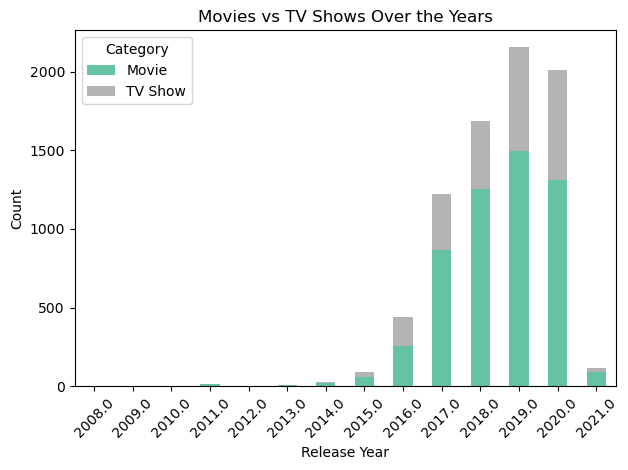

In [13]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Release_Year'] = df['Release_Date'].dt.year
type_year = df.groupby(['Release_Year', 'Category']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
type_year.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

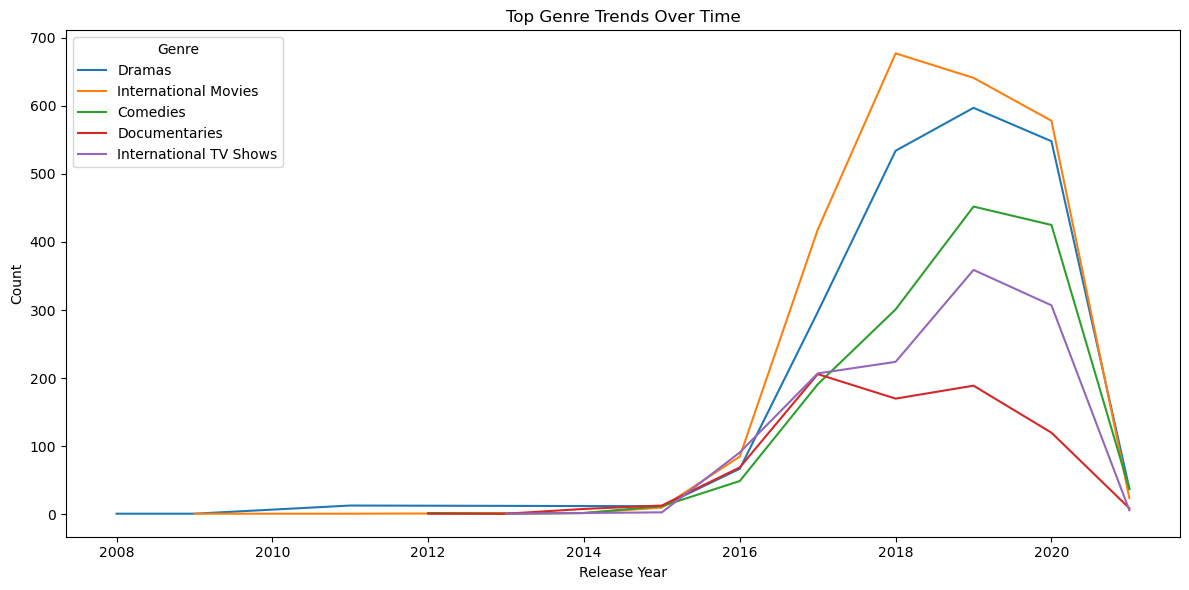

In [16]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

df['Genres'] = df['Type'].str.split(', ')

# Exploding genres into separate rows
genre_exploded = df.explode('Genres')

# Counting genres by year
genre_year = genre_exploded.groupby(['Release_Year', 'Genres']).size().reset_index(name='Count')

# Identifing top 5 genres overall
top_genres = genre_year.groupby('Genres')['Count'].sum().sort_values(ascending=False).head(5).index

# Filtering for top genres
filtered = genre_year[genre_year['Genres'].isin(top_genres)]

# Plotting genre trends
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='Release_Year', y='Count', hue='Genres')
plt.title('Top Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

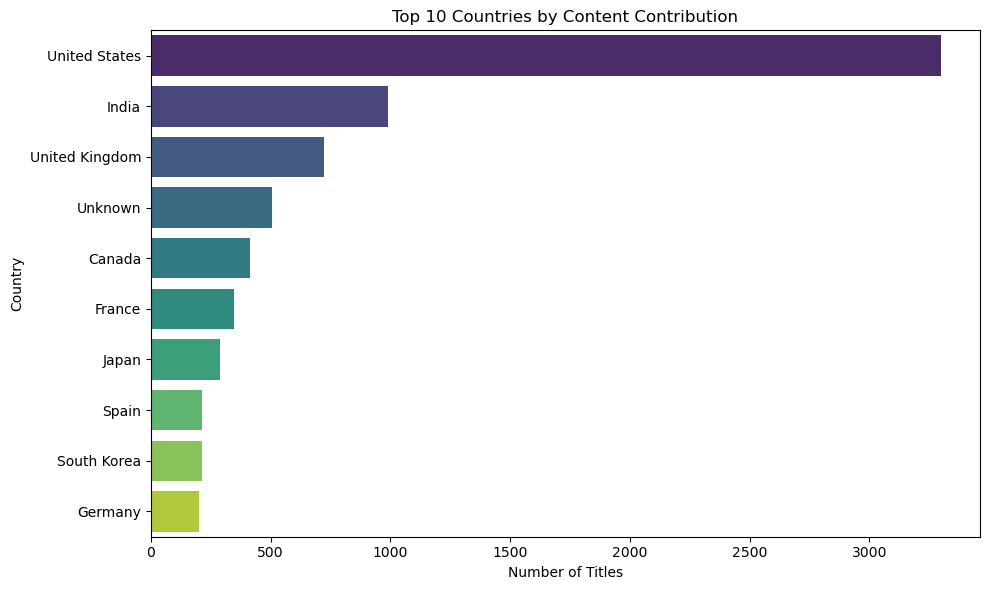

In [19]:
# Creating a DataFrame for plotting
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Count']

# Plotting with hue and legend disabled
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_df, x='Count', y='Country', hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Content Contribution')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [20]:
# Total Movies and TV Shows
print("Total Movies:", df[df['Category'] == 'Movie'].shape[0])
print("Total TV Shows:", df[df['Category'] == 'TV Show'].shape[0])

# Most common genre
print("Most common genre:", genre_exploded['Genres'].value_counts().idxmax())

# Top contributing country
print("Top contributing country:", country_exploded['Countries'].value_counts().idxmax())

Total Movies: 5379
Total TV Shows: 2410
Most common genre: International Movies
Top contributing country: United States


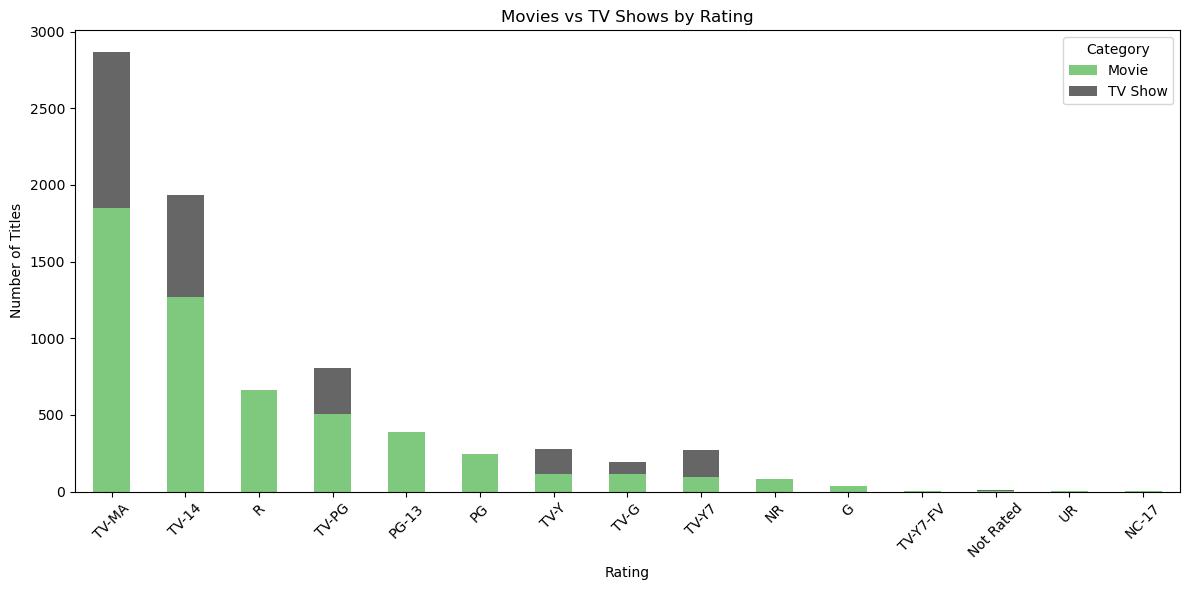

In [25]:
rating_type = df.groupby(['Rating', 'Category']).size().unstack().fillna(0).sort_values(by='Movie', ascending=False)

# Plot
rating_type.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title('Movies vs TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()